<a href="https://colab.research.google.com/github/NgaanLee/DataAnalystDeepLearning/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo các thư viện
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation


# Loading Training Data


Tập dữ liệu MNIST được đóng gói thuận tiện trong Keras và chúng tôi có thể dễ dàng phân tích một số tính năng của nó bằng Python.

In [2]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28
print("x_train shape",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


Sử dụng matplotlib, vẽ một số hình ảnh mẫu từ tập huấn luyện

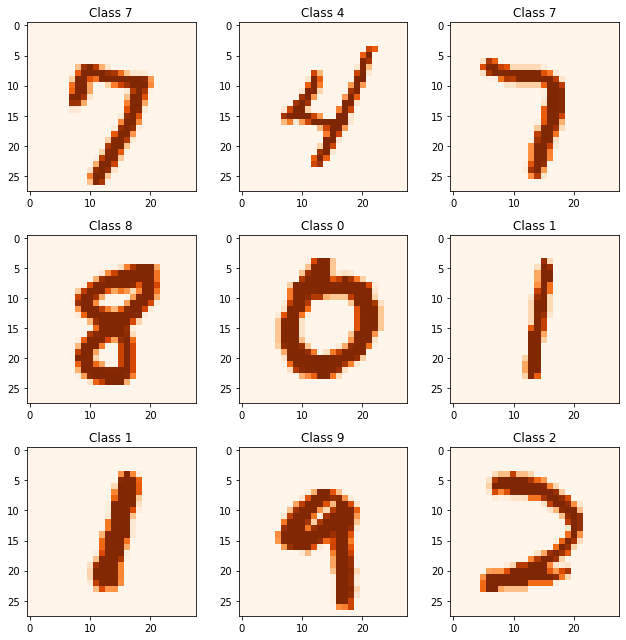

In [5]:
# Nếu muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train thì dùng hàm sau
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num].reshape(28,28),cmap='Oranges',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()  


# Formatting the input data layer

Thay vì ma trận 28 x 28, xây dựng mạng để chấp nhận một vectơ có độ dài 784. 

Sau đó, mỗi hình ảnh cần được định hình lại (hoặc làm phẳng) thành một vectơ. 

Chuẩn hóa các đầu vào trong phạm vi [0-1] thay vì [0-255]. Chuẩn hóa đầu vào, để bất kỳ thứ nguyên bổ sung nào (đối với các kiến ​​trúc mạng khác) đều có cùng tỷ lệ.

In [6]:
# thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector, 
# vì tập dữ liệu mnist được lưu ở dạng 
# ma trận 2 chiều gồm 28 dòng và 28 cột
# trước khi truyền vào mạng neural cần chuyển sang dạng vector. Nếu dùng mạng CNN thì ko cần chuyển
# mạng CNN các sv tự tìm hiểu thêm
# 784= 28*28
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

# sau khi chuẩn hóa xong muốn xem lại tập train thì cùng hàm print
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# tương tự đối với tập train,tập test chỉ gồm 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

# sau khi chuẩn hóa xong muốn xem lại tập test thì cùng hàm print
print(x_test)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# vì đầu ra của mạng neural là nhận dạng 1 tấm ảnh thuộc 1 trong các lớp 0-9, nên ta dùng hàm này để 
# gán các giá trị kết quả cho tập y_test
# ví dụ tấm ảnh là số 2 thì y_test ứng với tấm đó là:
# [[0. 0. 1. ... 0. 0. 0.]]
# giá trị ở vị trí số 2 là 1, các giá trị còn lại là 0
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)



**Diễn giải**:
* model= Sequential(): Khai báo mô hình
* model.add(...): Thêm một thành phần vào trong mô hình
* Dense(number, input_shape(,)): kết nối tất cả các phần tử layer hiện tại với toàn bộ các phần tử của layer trước đó. Giá trị đầu tiên trong Dense bằng **number** thể hiện việc có **number** phần tử ở layer này. input_shape = (,) chính là kích thước của dữ liệu đầu vào. Kích thước này là một tuple nên ta cần viết dưới dạng tuple, thí dụ (784,)
* Activation ('relu/softmax/linear'): 



**The first hidden layer( lớp ẩn đầu tiên)**

In [9]:
model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))

**Adding the second hidden layer(Thêm lớp ẩn thứ hai)**

In [10]:
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))


**The Final Output Layer**

In [11]:
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
# Với các bài toán classification (phân loại) thì nếu có 2 lớp thì hàm activation ở output layer là hàm sigmoid, 
# còn nhiều hơn 2 lớp thì hàm activation ở ouput layer là hàm softmax
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________

**Hàm loss function**:


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history = model.fit(x_train,y_train,batch_size=128,epochs=5)

# dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
# giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)



Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6525 - accuracy: 0.8119
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3065 - accuracy: 0.9120
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.9216
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2466 - accuracy: 0.9287
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9332


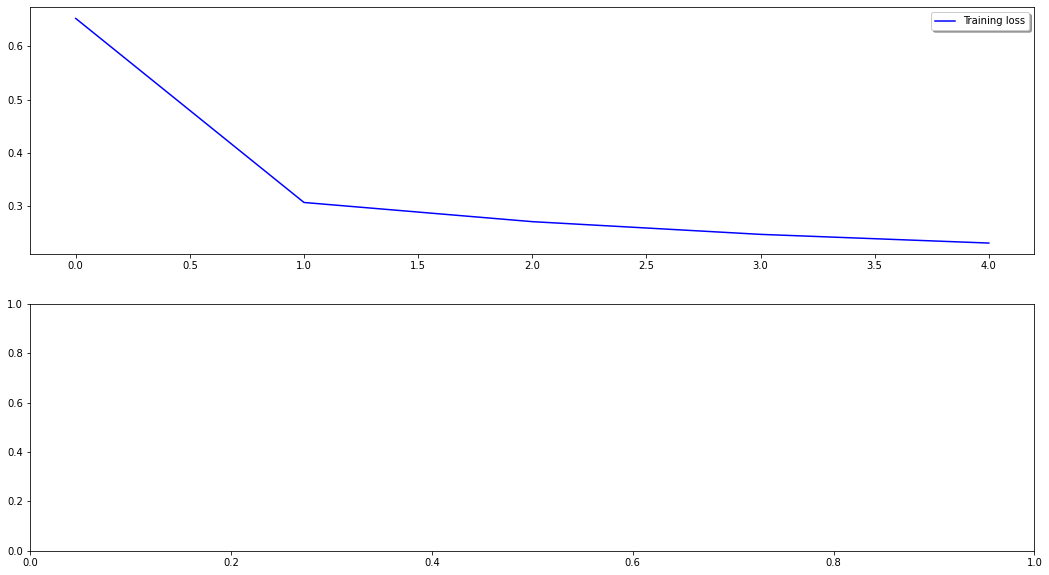

In [13]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

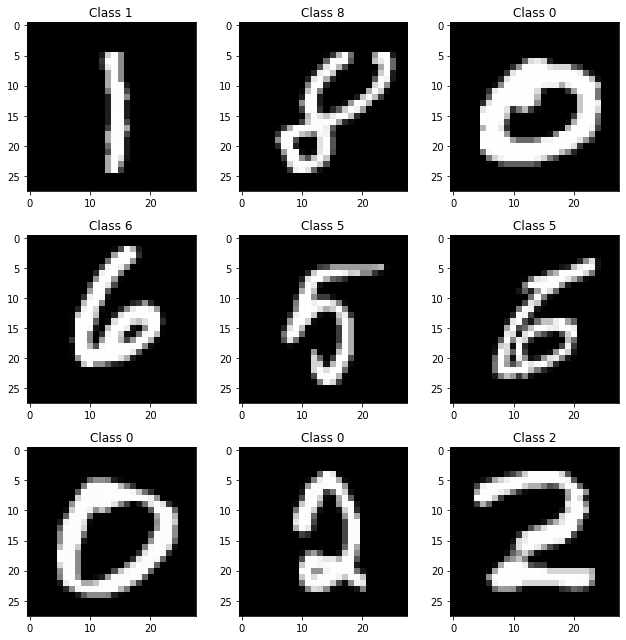

In [18]:
# hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
# hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
# vì hàm imshow để hiển thị tấm ảnh dạng 28*28, vì ta đã reshape tấm ảnh thành dạng vector ở bước trước
# nên bây giờ muốn hiển thị tấm ảnh cho tập dữ liệu đã reshape, ta lại dùng hàm reshape để về dạng ban đầu
# vì hàm softmax dùng ở mạng neural ở lớp output là hàm tính xác suất, nên xác suất rơi vào lớp nào nhiều nhất thì output sẽ ra giá trị đó.
# muốn xuất kết quả dự báo, ta dùng hàm argmax()
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()  
# sinh viên quan sát kết quả và nhận xét

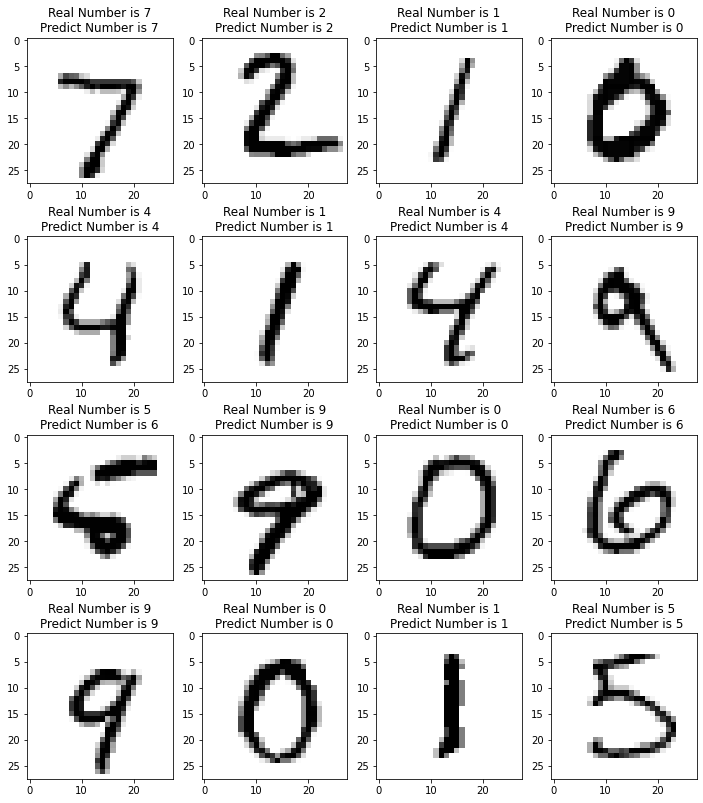

In [20]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");